In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
__INTERIM_DATA_PATH__ = "../data/interim"

## Salary

In [31]:
salary_df = pd.read_csv(f"{__INTERIM_DATA_PATH__}/salary_df.csv", index_col=0)
print(salary_df.shape)
salary_df.head(300)

(456373, 4)


,pk_cid,age,salary,knn_salary
0,1550397,2,NaN,177539.280
1,1526522,2,NaN,177539.280
2,1419718,2,178055.85,178055.850
3,1513456,2,NaN,177539.280
4,1539094,2,NaN,177539.280
...,...,...,...,...
295,1388204,4,69443.88,69443.880
296,1522563,4,NaN,124853.175
297,1404880,4,304666.92,304666.920
298,1388226,4,48415.65,48415.650


In [28]:
def describe_graph(dataframe: pd.DataFrame, column: str):
    dataframe_describe = dataframe[[column]].describe()
    dataframe_describe.reset_index(inplace=True)
    dataframe_describe = dataframe_describe[dataframe_describe["index"] != "count"]

    sns.catplot(x="index", y=column, data=dataframe_describe, kind="point")
    plt.show()

    return dataframe_describe

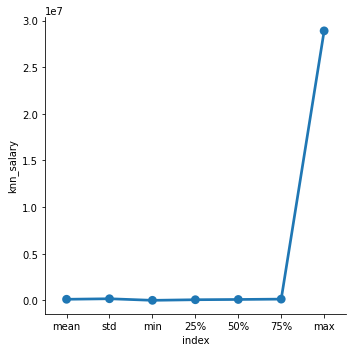

,1,2,3,4,5,6,7
index,mean,std,min,25%,50%,75%,max
knn_salary,113732.277922,170356.494546,1202.73,65474.205,93403.875,131398.17,28894395.51


In [30]:
describe_graph(salary_df, "knn_salary").T

Grafico sin el quantile 99


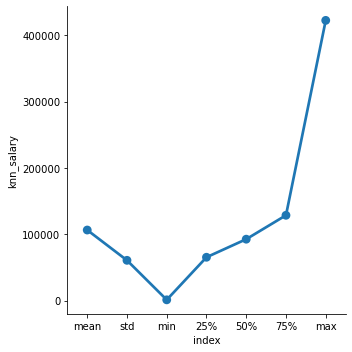

,1,2,3,4,5,6,7
index,mean,std,min,25%,50%,75%,max
knn_salary,106386.736407,60734.606049,1202.73,65344.08,92580.84,128593.05,422304.75


In [33]:
print("Grafico sin el quantile 99")
salary_to_describe = salary_df[salary_df["knn_salary"] <= np.quantile(salary_df["knn_salary"], q=0.99)]
describe_graph(salary_to_describe, "knn_salary").T